In [7]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [10]:
def retrieve_data():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        milk = pd.read_sql_table('milk_volume', con)
    return milk
milk = retrieve_data()

In [14]:
s = milk.groupby('days_since_calving').mean().reset_index()

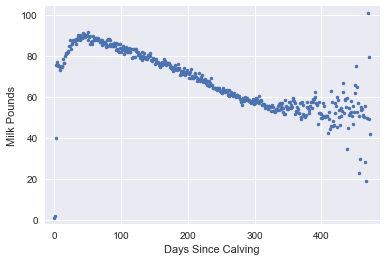

In [15]:
_ = plt.plot(s['days_since_calving'], s['milk_weight'], marker='.', linestyle='none')
_ = plt.margins(0.03)
_ = plt.xlabel('Days Since Calving')
_ = plt.ylabel('Milk Pounds')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131546 entries, 0 to 131545
Data columns (total 8 columns):
index                 131546 non-null int64
date                  131546 non-null datetime64[ns]
animal_id             131546 non-null int64
milk_weight           131546 non-null float64
average_flow          131546 non-null float64
max_flow              131546 non-null float64
date_calved           125904 non-null datetime64[ns]
days_since_calving    125904 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 8.0 MB


In [67]:
mask = milk['days_since_calving'] == np.nan
milk[mask]

In [68]:
mask = ~milk['animal_id'].isin(bad_ids)
o = milk[mask]

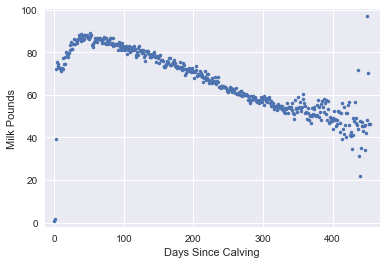

In [69]:
s = o.groupby('days_since_calving').mean().reset_index()
_ = plt.plot(s['days_since_calving'], s['milk_weight'], marker='.', linestyle='none')
_ = plt.margins(0.03)
_ = plt.xlabel('Days Since Calving')
_ = plt.ylabel('Milk Pounds')
plt.show()